# *Sistem Rekomendasi Film*

Disini Saya Menggunakan Dataset Dari Kaggle Yang Bernama "Movies Dataset"

Disusun oleh :

- Nama : Adinda Chandra Ayu Kusumawardhana
- ID : mc009d5x0392
- Email : mc009d5x0392@student.devacademy.id
- Link Dataset : https://www.kaggle.com/datasets/ashishkumarjayswal/movies-updated-data

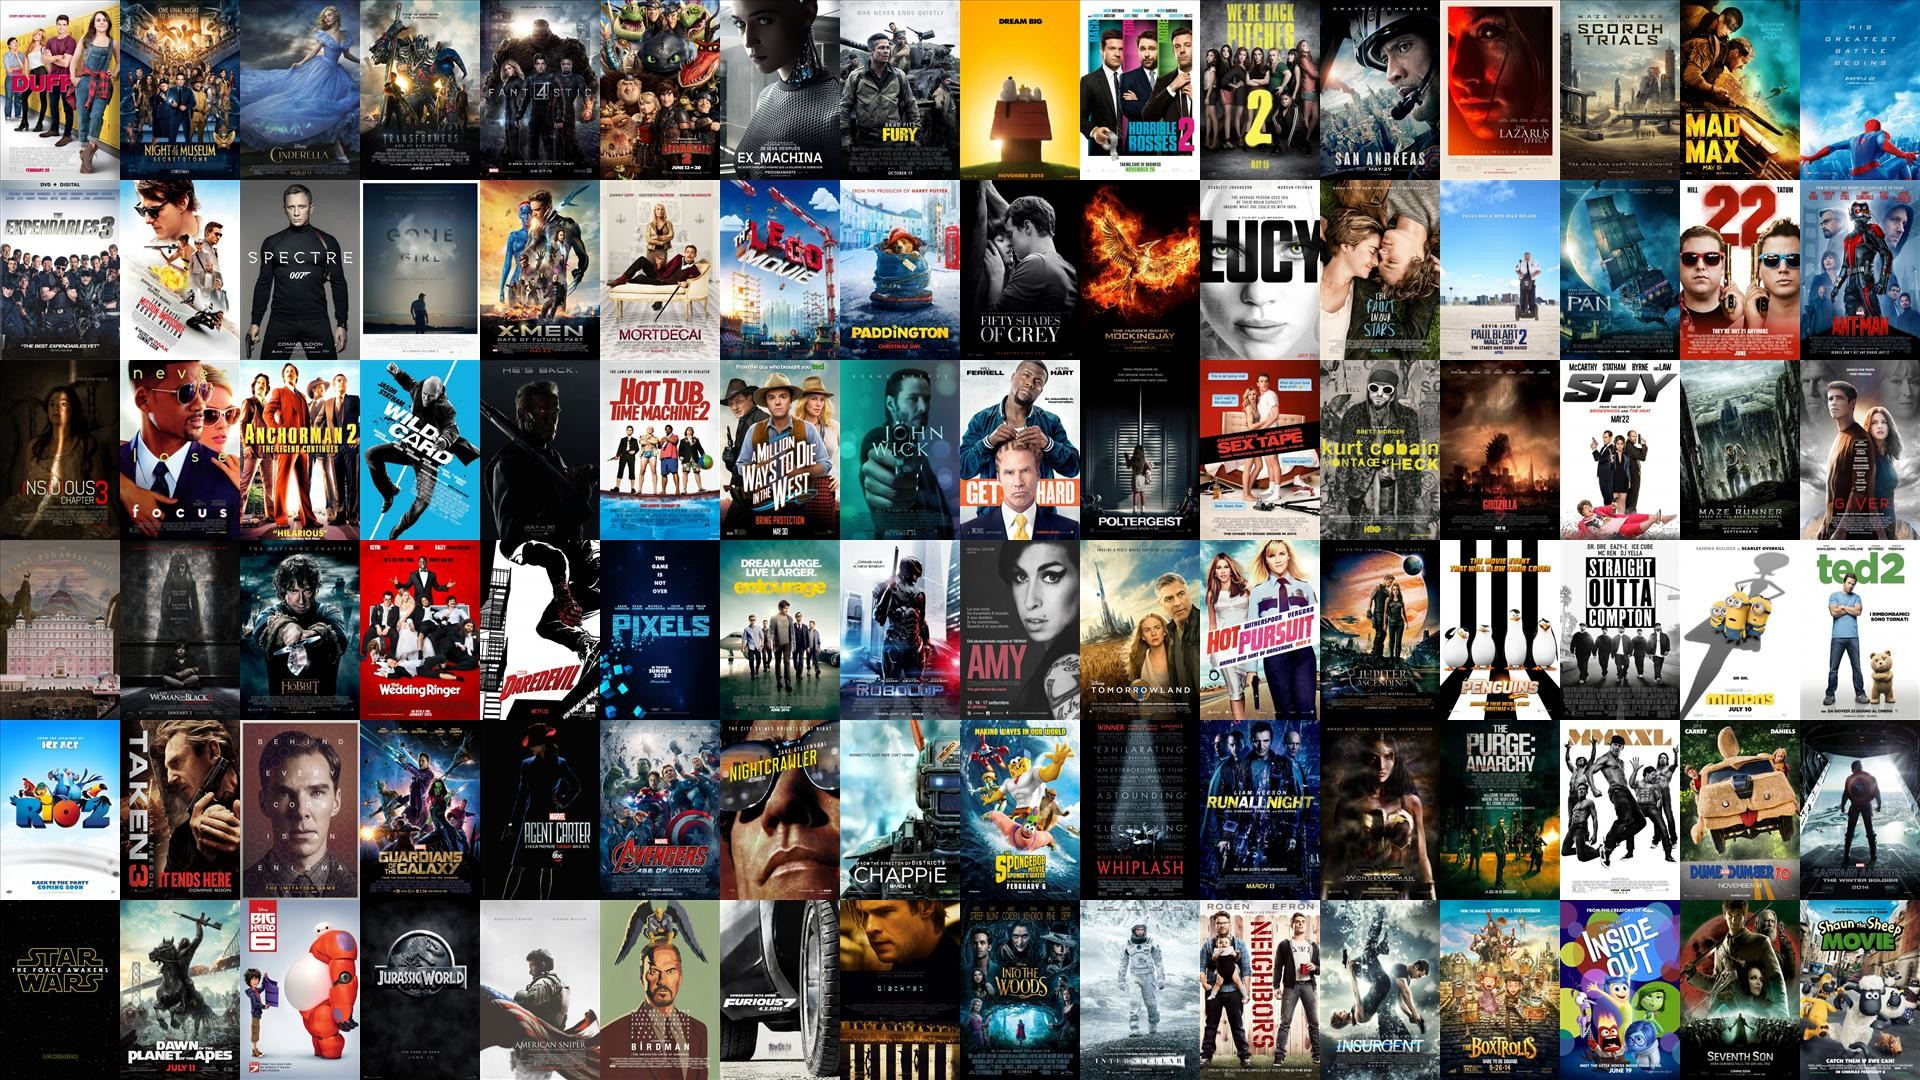

# Persiapan

### 1. Pertama-tama kita Import Library yang dibutuhkan terlebih dahulu

In [1]:
from google.colab import files, drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import random
import re

### 2. Disini kita mulai untuk menghubungkan ke gdrive, karena saya mendownloadnya dan memasukkannya ke gdrive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Ketika Di run maka collab akan meminta izin untuk menghubungkan ke gdrive

### 3. Selanjutnya kita upload API dari kaggle dan memasukkannya ke file upload

In [3]:
files.upload()  # Pilih kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taufikurrahman3ia02","key":"9e7476711fde76af5913b52f862589be"}'}

### 4. ketika sudah terhubung, kita bisa mendownload dataset dari kaggle dan menaruhnya di gdrive karena sudah diberi izin untuk membaca dan mengedit di gdrive

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Kode diatas digunakan agar bisa akses dan download dataset dari Kaggle lewat API.

In [5]:
!kaggle datasets download -d ashishkumarjayswal/movies-updated-data -p /content/drive/MyDrive/Dataset_Dicoding

Dataset URL: https://www.kaggle.com/datasets/ashishkumarjayswal/movies-updated-data
License(s): CC0-1.0
movies-updated-data.zip: Skipping, found more recently modified local copy (use --force to force download)


file dataset sudah didownload dan sudah di taruh di folder "Dataset_Dicoding"

### 5. selanjutnya import file zip tersebut dan lakukan unzip

In [6]:
!unzip /content/drive/MyDrive/Dataset_Dicoding/movies-updated-data.zip

Archive:  /content/drive/MyDrive/Dataset_Dicoding/movies-updated-data.zip
  inflating: movies_updated.csv      


setelah di unzip file akan terlihat di penyimpanan sementara collab

### 6. Buka file "movies-updated-data.csv"

In [7]:
film = pd.read_csv('/content/movies_updated.csv')

# Data Understanding

### 1. Menampilkan 10 data pertama di Dataframe

In [8]:
film.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601.0,Paramount Pictures,"95.0,"
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890.0,Universal Pictures,"133.0,"
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427.0,Chartoff-Winkler Productions,"129.0,"
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706.0,Dovemead Films,"127.0,"
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189.0,United Artists,"100.0,"


kita print berapa banyak data yang ada pada "anime-filtered.csv".

In [9]:
print(f'Terdapat film sebanyak  {film.shape[0]} Table dan {film.shape[1]} Kolom.')

Terdapat film sebanyak  4000 Table dan 15 Kolom.


### 2.  menampilkan jumlah data (non-null) di setiap kolom

In [10]:
for idx, kolom in enumerate(film.columns, start=1):
    jumlah = film[kolom].count()
    print(f"Kolom {idx:2d}: {kolom} - Berjumlah:  {jumlah}")

Kolom  1: name - Berjumlah:  4000
Kolom  2: rating - Berjumlah:  3960
Kolom  3: genre - Berjumlah:  4000
Kolom  4: year - Berjumlah:  4000
Kolom  5: released - Berjumlah:  4000
Kolom  6: score - Berjumlah:  4000
Kolom  7: votes - Berjumlah:  4000
Kolom  8: director - Berjumlah:  4000
Kolom  9: writer - Berjumlah:  3999
Kolom 10: star - Berjumlah:  3999
Kolom 11: country - Berjumlah:  4000
Kolom 12: budget - Berjumlah:  4000
Kolom 13: gross - Berjumlah:  3831
Kolom 14: company - Berjumlah:  3990
Kolom 15: runtime,, - Berjumlah:  4000


### 3. Menampilkan Informasi Variabel variabel pada dataset

In [11]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime,,  4000 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 468.9+ KB


Berdasarkan output yang ditampilkan, dapat diketahui bahwa:

Dataframe ini memiliki total sebanyak 25 kolom.

- Dari keseluruhan kolom tersebut, 15 di antaranya bertipe data object, yang kemungkinan besar merepresentasikan fitur-fitur kategorikal. Kolom-kolom tersebut adalah :
  1. Name
  2. Rating
  3. Genre
  4. Released
  5. Director
  6. Writer
  7. Star
  8. Country
  9. Company
  10. Runtime

- Selain itu, terdapat 2 kolom bertipe float64 yang kemungkinan besar mengandung nilai numerik kontinu. Kolom tersebut adalah
  1. Score
  2. Gross

- Sementara itu, terdapat 8 kolom bertipe int64 yang juga kemungkinan berisi data numerik. Kolom-kolom ini meliputi:
  1. Year
  2. Votes
  3. Budget

Walaupun dataset ini menyediakan banyak fitur, hanya lima di antaranya yang akan difokuskan dalam pembuatan model sistem rekomendasi sederhana, yaitu:
1. Name
2. Score
3. Genre
4. Company
5. Star
6. Vote

Fitur-fitur lainnya memang memiliki potensi untuk digunakan dalam pengembangan model yang lebih baik, namun sekiranya ini sudah cukup untuk membangun model sederhana.

Pada model Content-Based Filtering, yang dibutuhkan adalah data ***Genres*** dan ***Name*** dari setiap anime.

Sedangkan untuk Collaborative Filtering, informasi yang digunakan adalah ***Name*** dari anime dan ***Score*** atau penilaian yang diberikan oleh pengguna.

### 4. Mengecheck Data Duplikat

In [12]:
# Mengecheck apakah ada film duplikat yang ada di filmset
film.duplicated().sum()

np.int64(0)

Bisa terlihat tidak ada data duplikat yang terdeteksi

In [13]:
film.isnull().sum()

,0
name,0
rating,40
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,1
star,1


In [14]:
print(film.columns[film.isnull().any()])

Index(['rating', 'writer', 'star', 'gross', 'company'], dtype='object')


Terdapat Misiing Value :
- 40 pada Rating
- 1 pada Writer
- 1 pada Star
- 169 pada Gross
- 10 pada Company

In [15]:
film = film.dropna(axis=0)

In [16]:
film.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


Sudah tidak terdapat missing value

# EDA ( Exploratory Data Analysis )

### 1. Penjelasan Variabel

In [17]:
film.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime,,'],
      dtype='object')

| Kolom        | Tipe Data        | Deskripsi                                                                                     | Cara Pakai di Model                                                                                      |
| ------------ | ---------------- | --------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **name**     | `object`         | Judul film.                                                                                   | Sebagai label/ID unik; bisa juga digunakan untuk menampilkan hasil rekomendasi.                          |
| **rating**   | `float`/`object` | Rating MPAA (misal “PG-13”, “R”, “G”).                                                        | Fitur kategorikal: mengelompokkan konten sesuai batas usia.                                              |
| **genre**    | `object`         | Kategori/jenis film (misal “Action”, “Comedy”, “Drama”). Bisa berisi beberapa genre per film. | Fitur multi-label: bisa di-encode dengan one-hot atau embedding genre.                                   |
| **year**     | `int`            | Tahun produksi film.                                                                          | Fitur numerik: mengukur umur film, tren preferensi berdasarkan era.                                      |
| **released** | `object`         | Tanggal rilis (misal “July 16, 2010”).                                                        | Bisa di-parse jadi tanggal (`datetime`) untuk ekstrak bulan, kuartal, hari dalam seminggu, dll.          |
| **score**    | `float`          | Skor rata-rata pengguna (misal IMDb score).                                                   | Fitur numerik: merepresentasikan popularitas/penilaian umum film.                                        |
| **votes**    | `int`            | Jumlah suara atau ulasan pengguna.                                                            | Fitur numerik: proxy untuk seberapa banyak orang yang menilai—indikator popularitas.                     |
| **director** | `object`         | Nama sutradara.                                                                               | Fitur kategorikal: di-encode (label/one-hot/embedding). Sutradara populer bisa meningkatkan rekomendasi. |
| **writer**   | `object`         | Nama penulis skenario.                                                                        | Serupa `director`: fitur kategorikal untuk menangkap gaya penulisan.                                     |
| **star**     | `object`         | Nama aktor/aktris utama.                                                                      | Fitur kategorikal penting—aktor favorit pengguna dapat memengaruhi rekomendasi.                          |
| **country**  | `object`         | Negara produksi film.                                                                         | Fitur kategorikal: mengelompokkan selera berdasarkan wilayah.                                            |
| **budget**   | `float`/`int`    | Anggaran pembuatan film (dalam USD).                                                          | Fitur numerik: film ber-anggaran besar cenderung produksi lebih “berkelas” dan populer.                  |
| **gross**    | `float`/`int`    | Pendapatan box-office (dalam USD).                                                            | Fitur numerik: proxy keberhasilan komersial—sering dikaitkan dengan popularitas massal.                  |
| **company**  | `object`         | Rumah produksi atau studio (misal “Warner Bros.”).                                            | Fitur kategorikal: studio besar biasanya memproduksi film dengan kualitas/genre tertentu.                |

### 2. Visualisasi

disini kita menampilkan Visualisasi persebaran Company atau rumah produksi dalam bentuk diagram berbentuk kue PIE yang dipotong potong untuk memperlihatkan persebaran data

In [18]:
# Melihat semua value unik pada kolom 'Company'
print("Nilai unik pada kolom 'Company':")
print(film['company'].unique())

Nilai unik pada kolom 'Company':
['Warner Bros.' 'Columbia Pictures' 'Lucasfilm' ... 'Dharma Productions'
 'IMF Internationale Medien und Film GmbH & Co. Produktions KG'
 'Chickie the Cop']


In [19]:
print(list(film['company'].unique()))

['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', 'Paramount Pictures', 'Orion Pictures', 'Universal Pictures', 'Chartoff-Winkler Productions', 'Dovemead Films', 'United Artists', 'The Malpaso Company', 'C.A.T. Films', 'Filmways Pictures', 'Rastar Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'IPC Films', 'AVCO Embassy Pictures', 'Lorimar Film Entertainment', 'Partisan Productions', 'Bryna Productions', 'Stephen Friedman/Kings Road Productions', 'Twentieth Century Fox', 'Guardian Trust Company', 'Cattle Annie Productions', 'Rastar Films', 'PolyGram Filmed Entertainment', 'Camp Hill', 'EMI Films', 'Walt Disney Productions', 'Melvin Simon Productions', 'Jack Rollins & Charles H. Joffe Productions', 'Opera Film Produzione', 'International Cinema', 'Mulberry Square Productions', 'American Cinema Productions', 'Major Studio Partners', 'Brooksfilms', 'Braun Entertainment Group', 'Kings Road Entertainment', 'Lee Mendelson Film Productions', 'Alive Enterprises', 'Borough Park Productions', 'Mike Lo

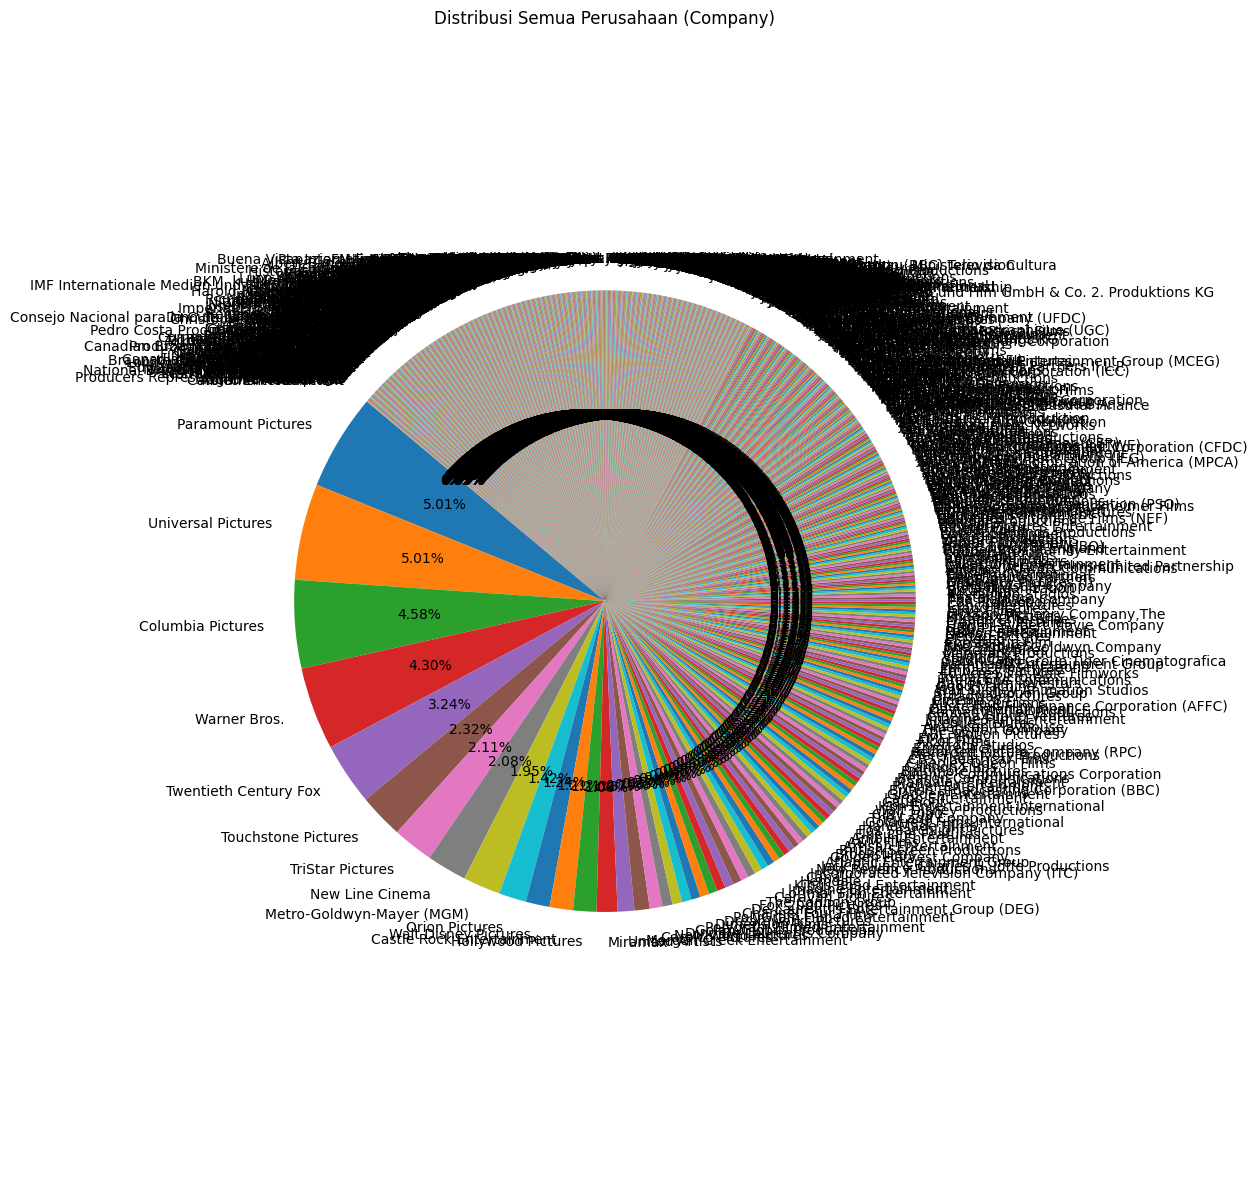

In [20]:
# Hitung jumlah masing-masing company
company_counts = film['company'].value_counts()

# Siapkan data untuk pie chart
labels = company_counts.index.tolist()
sizes = company_counts.values.tolist()

# Pie chart
plt.figure(figsize=(12, 12))
plt.title('Distribusi Semua Perusahaan (Company)')
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=140)
plt.axis('equal')  # Agar bentuk lingkarannya bulat
plt.tight_layout()
plt.show()


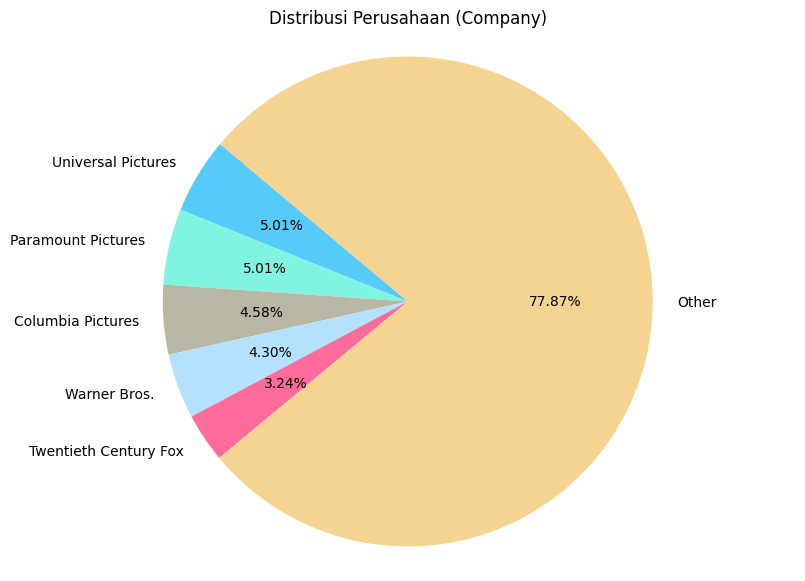

In [21]:
# Daftar perusahaan yang ingin ditampilkan secara eksplisit
target_companies = [
    'Universal Pictures',
    'Paramount Pictures',
    'Columbia Pictures',
    'Warner Bros.',
    'Twentieth Century Fox'
]

# Hitung jumlah kemunculan setiap company
company_counts = film['company'].value_counts()

# Buat dictionary untuk menyimpan jumlah masing-masing target company
company_distribution = {}

for company in target_companies:
    company_distribution[company] = company_counts.get(company, 0)

# Hitung jumlah untuk kategori "Other"
other_count = company_counts[~company_counts.index.isin(target_companies)].sum()
company_distribution['Other'] = other_count

# Siapkan film untuk pie chart
labels = list(company_distribution.keys())
sizes = list(company_distribution.values())
colors = ['#56CBF9', '#81F4E1', '#B8B7A4', '#B4E1FF', '#FF6C9B', '#F5D491', '#A9A9A9']

# Plot pie chart
plt.figure(figsize=(10, 7))
plt.title('Distribusi Perusahaan (Company)')
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=140)
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran sempurna
plt.show()


dari hasil yang terlihat :
- Universal Pictures = 5.01%
- Paramaunt Pictures = 5.01%
- Columbia Pictures = 4.58%
- Warner Bros = 4.30%
- Twentieth Century fox = 3.24%
- Other = 77.87%

Total =  100.01%

Selisih 0.01% ini biasanya disebabkan oleh pembulatan angka saat menggunakan autopct='%.2f %%'

Menampilkan Distribusi Skor Rata rata

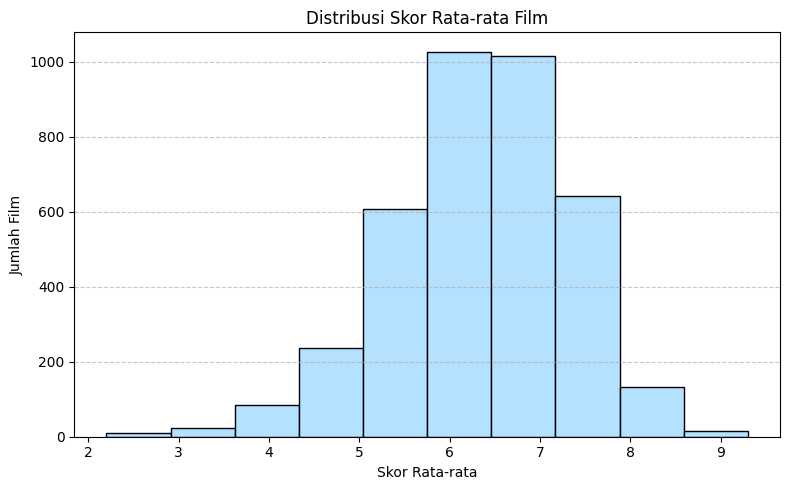

In [22]:
# Menampilkan distribusi skor rata-rata anime
plt.figure(figsize=(8, 5))
plt.hist(film['score'], bins=10, color='#B4E1FF', edgecolor='black')
plt.title('Distribusi Skor Rata-rata Film')
plt.xlabel('Skor Rata-rata')
plt.ylabel('Jumlah Film')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.  Ringkasan Statistik Dataframe

In [23]:
# melihat ringkasan statistik dari kolom-kolom numerik dalam sebuah DataFrame dan hasilnya di transspose
film.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3795.0,1.991363e+03,5.900553e+00,1980.0,1987.0,1992.0,1996.0,2.001000e+03
score,3795.0,6.329328e+00,9.674957e-01,2.2,5.7,6.4,7.0,9.300000e+00
votes,3795.0,5.691026e+04,1.460030e+05,105.0,4900.0,14000.0,48000.0,2.400000e+06
budget,3795.0,1.616749e+07,2.279973e+07,0.0,0.0,8000000.0,22000000.0,2.000000e+08
gross,3795.0,4.203222e+07,9.293949e+07,309.0,2924308.5,12049514.0,35809829.0,2.201647e+09


In [24]:
#  menampilkan 5 baris pertama dari data anime yang memiliki jumlah anggota (Members) terbanyak
film.sort_values('votes', ascending=False).iloc[:5]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291.0,Castle Rock Entertainment,"142.0,"
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702.0,Fox 2000 Pictures,"139.0,"
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762.0,Miramax,"154.0,"
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133.0,Paramount Pictures,"142.0,"
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000,897690072.0,New Line Cinema,"178.0,"


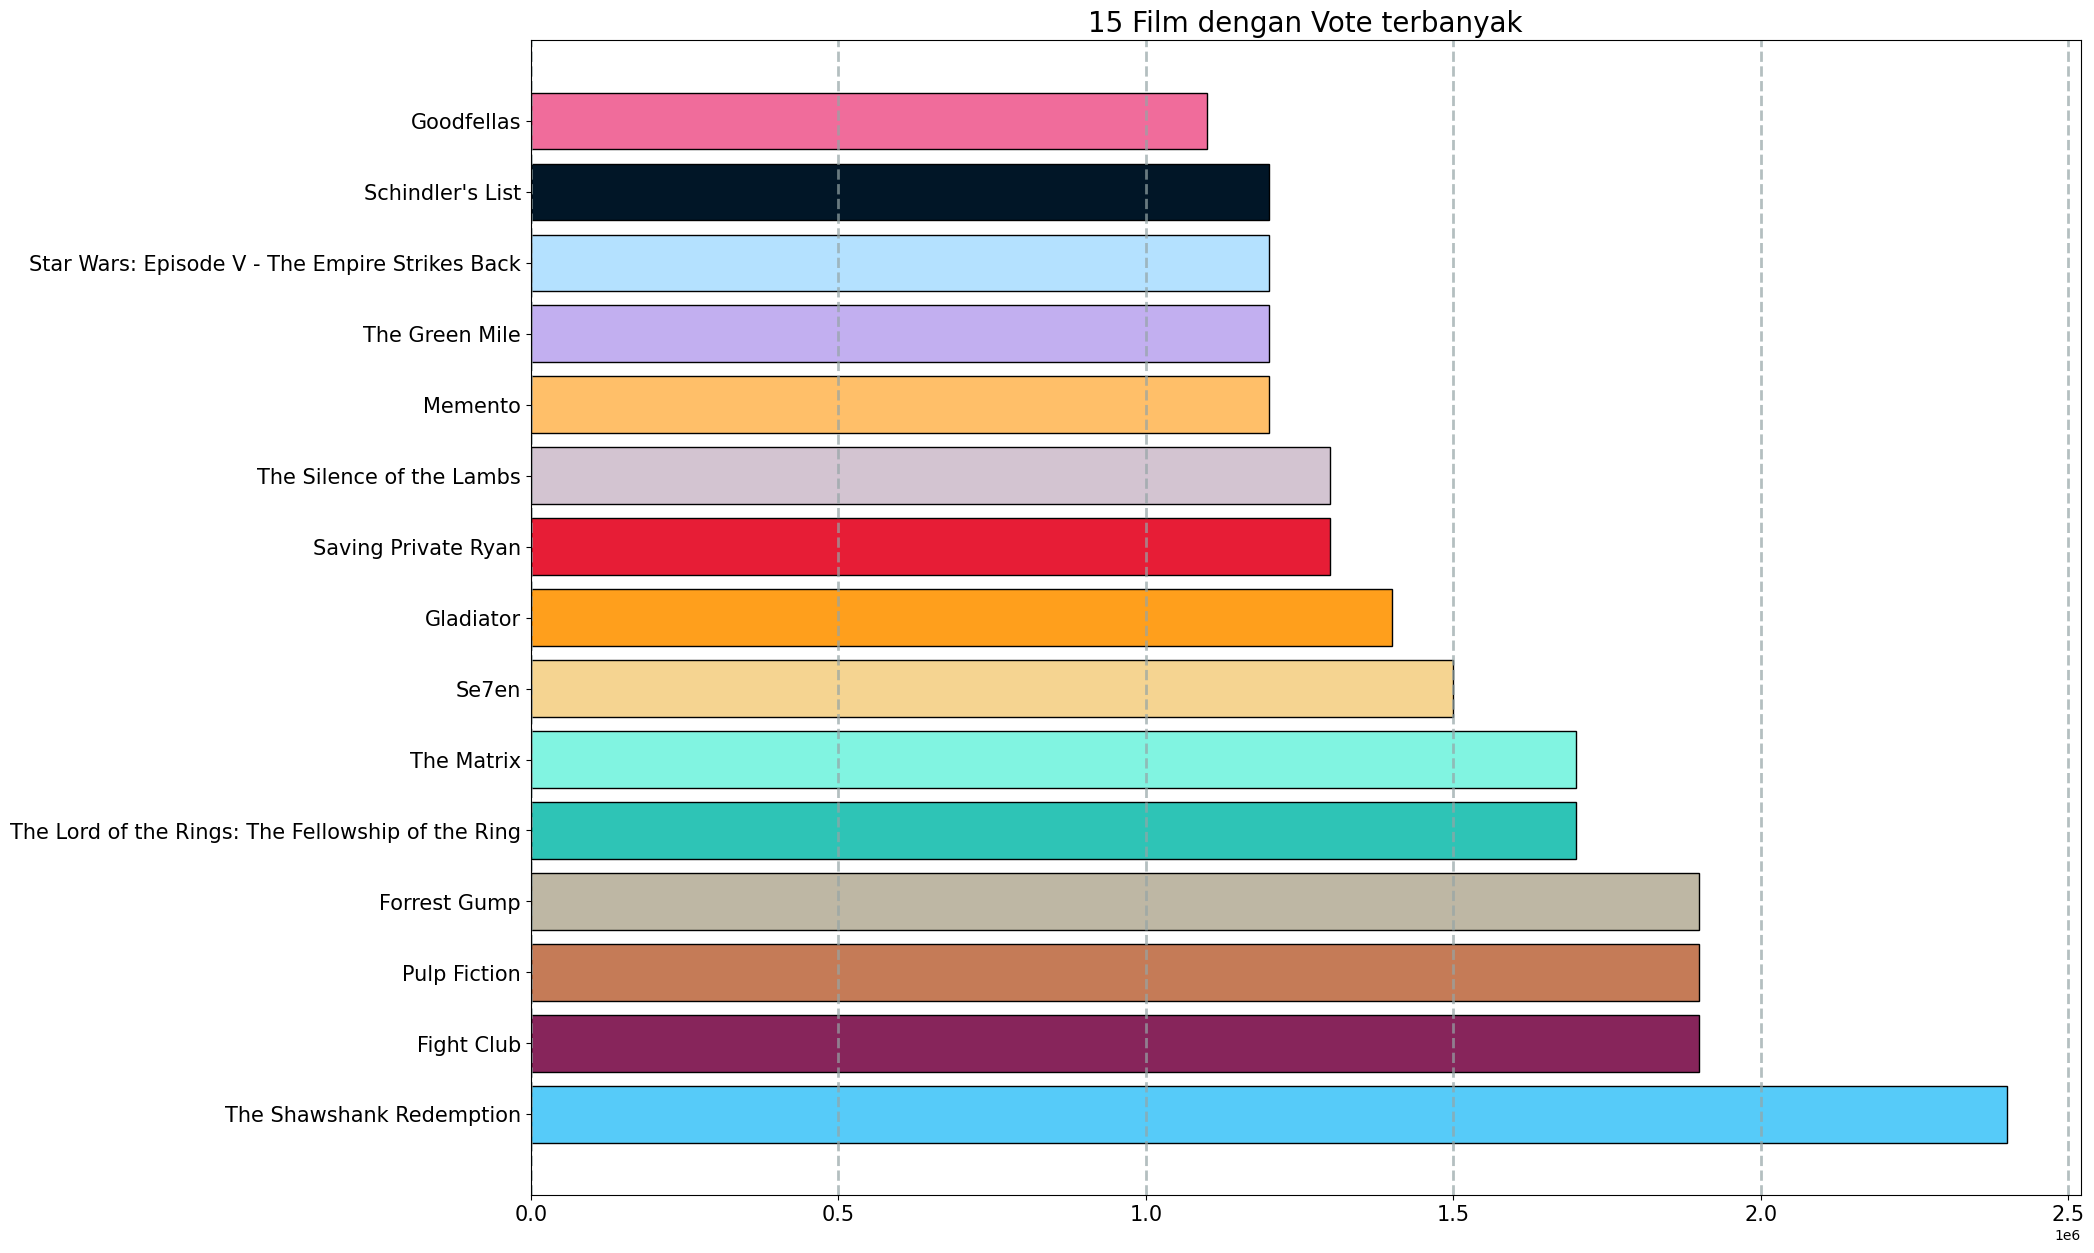

In [25]:
# Menampilkan 15 Anime Dengan Komunitas Terbesar

plt.figure(figsize=(20, 15))

# Ambil 15 anime teratas berdasarkan jumlah Members
film_terpopuler = film[['name', 'votes']].sort_values('votes', ascending=False).head(15)

# Daftar warna tetap, tapi urutannya diacak
warna_batang = ['#FF9F1C', '#2EC4B6', '#E71D36', '#011627', '#FFBF69','#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF',
                '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']
random.shuffle(warna_batang)  # Mengacak urutan warna

nama_film = film_terpopuler['name'].values
jumlah_vote = film_terpopuler['votes'].values

# Plot grafik batang horizontal
plt.barh(nama_film, jumlah_vote, color=warna_batang, edgecolor='black')

plt.grid(axis='x', linestyle='--', linewidth=2, color='#95a5a6', alpha=0.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("15 Film dengan Vote terbanyak", fontdict={'fontsize': 20})
plt.show()

In [26]:
film.sort_values(by='score', ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291.0,Castle Rock Entertainment,"142.0,"
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245.0,Universal Pictures,"195.0,"
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762.0,Miramax,"154.0,"
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133.0,Paramount Pictures,"142.0,"
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000,897690072.0,New Line Cinema,"178.0,"


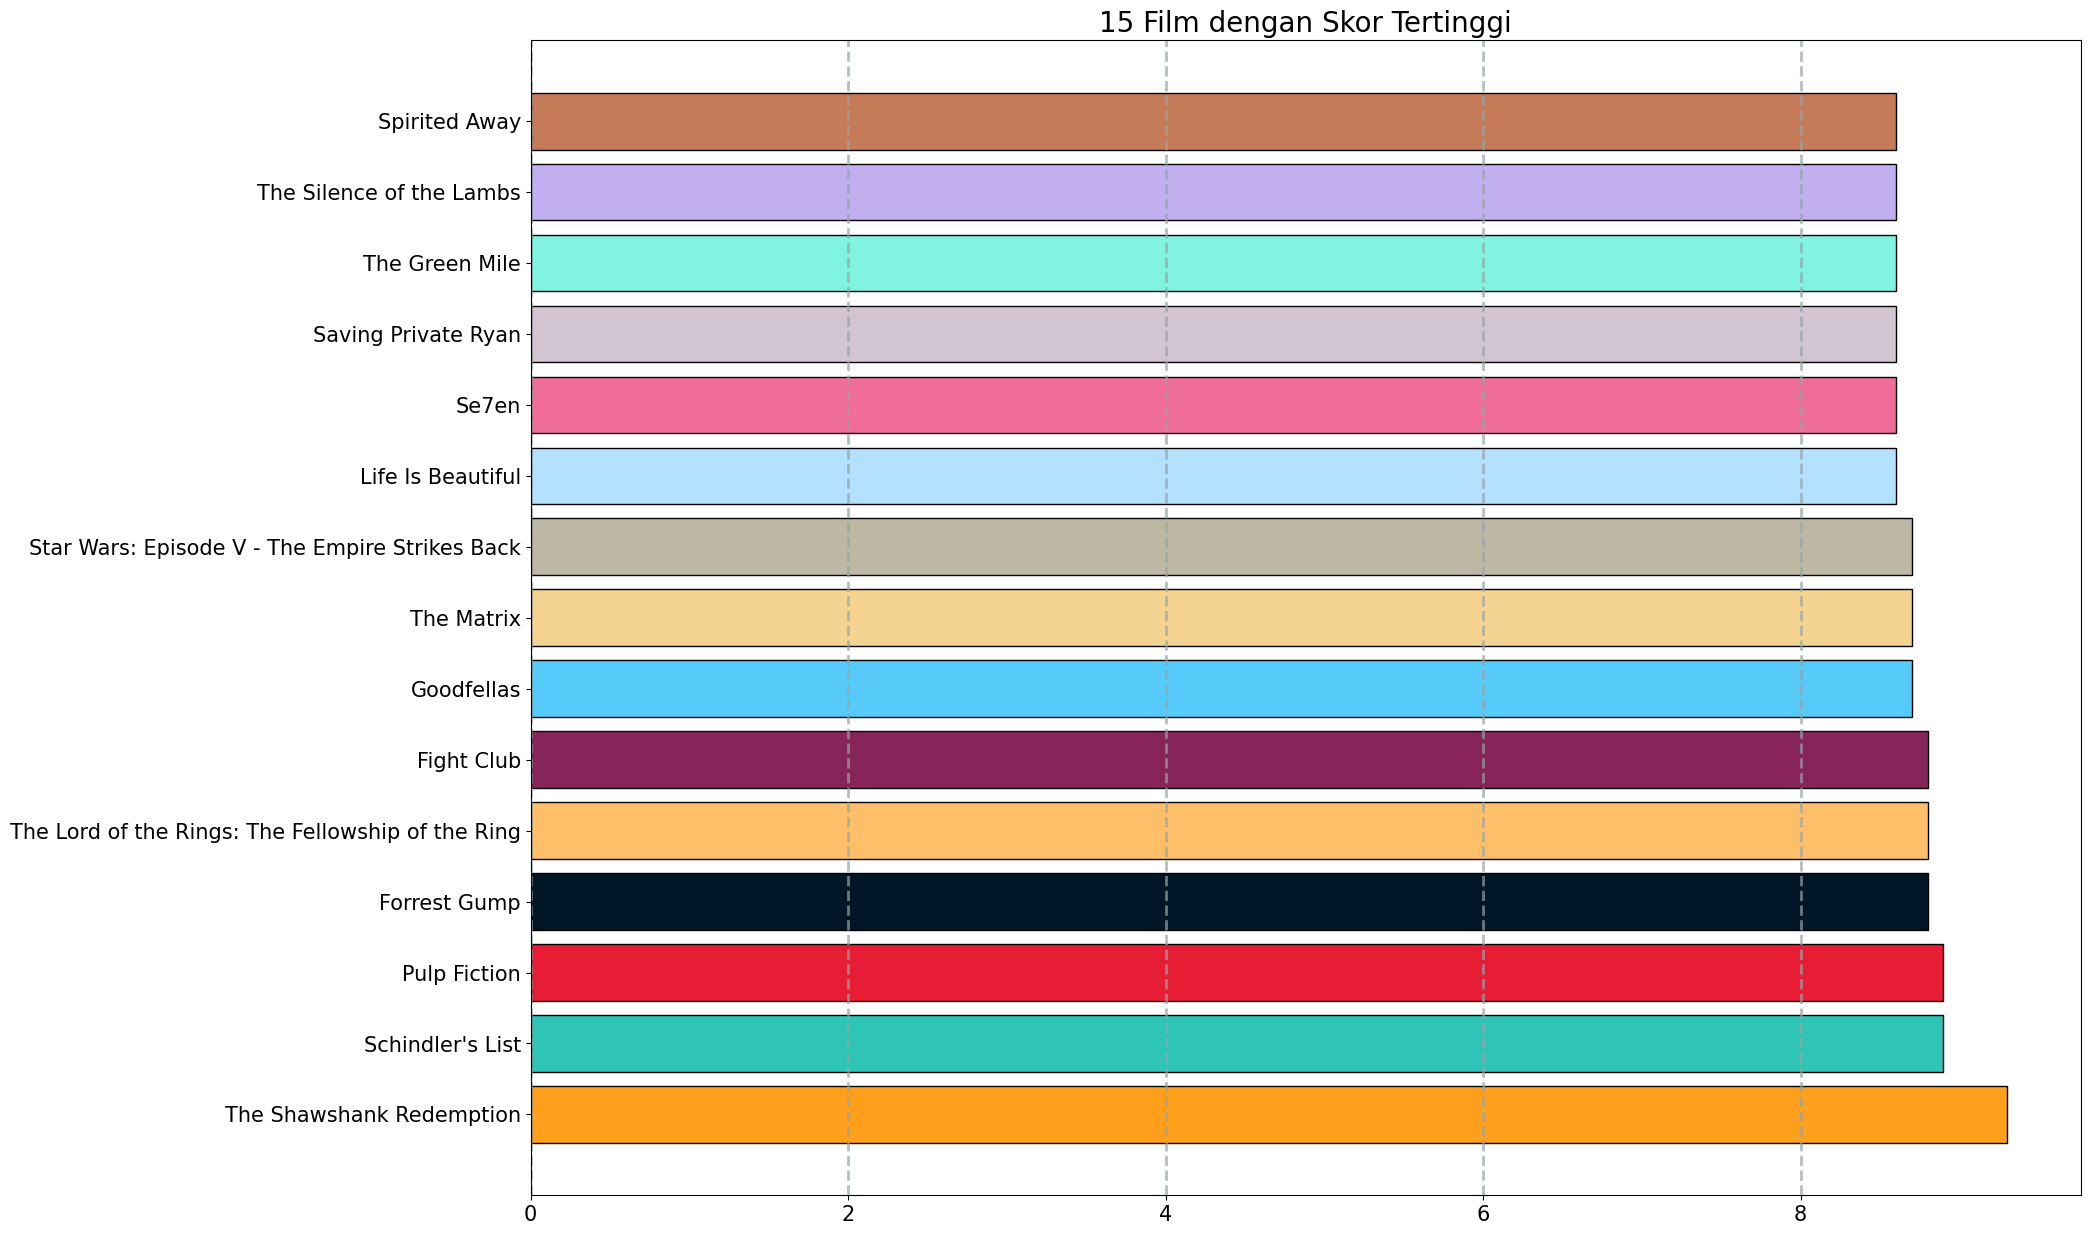

In [27]:
# Menampilkan 15 Anime Populer

plt.figure(figsize=(20, 15))

# Mengambil 15 anime teratas berdasarkan nilai skor tertinggi
film_terbaik = film[['name', 'score']].sort_values(by='score', ascending=False).head(15)

# Menentukan warna untuk setiap batang grafik
warna_batang = ['#FF9F1C', '#2EC4B6', '#E71D36', '#011627', '#FFBF69','#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF',
                '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

# Menyusun label dan nilai skor
label_film = film_terbaik['name'].values.flatten()
nilai_skornya = film_terbaik['score'].values.flatten()

# Membuat grafik batang horizontal
plt.barh(label_film, nilai_skornya, color=warna_batang, edgecolor='black')

# Menambahkan grid pada sumbu x
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)

# Mengatur ukuran teks pada sumbu x dan y
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Menambahkan judul pada grafik
plt.title("15 Film dengan Skor Tertinggi", fontdict={'fontsize': 20})

# Menampilkan grafik
plt.show()


# Data Preparation

### 1. Melakukan Pembersihan Text pada kolom ***Name***

In [28]:
# membersihkan teks dalam kolom Name pada DataFrame
def text_cleaning(text):
  text = re.sub(r"[^\w\s]", "", text)
  text = re.sub(r"https?://[^\s]+", "", text)
  return text

film['name'] = film['name'].apply(text_cleaning)

penghapusan diatas berfungsi untuk
- Menghilangkan karakter non-huruf/angka dan simbol.
- Menghapus alamat tautan (URL) dari teks.

In [29]:
film

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars Episode V The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,"February 1, 2002 (United States)",6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,"93.0,"
3996,Human Nature,R,Comedy,2001,"September 12, 2001 (France)",6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,"96.0,"
3997,Made,R,Comedy,2001,"August 31, 2001 (United States)",6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,"95.0,"
3998,One Night at McCools,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,"93.0,"


### 2. Selanjutnya kita check apakah ada data duplikat

In [30]:
film.duplicated().sum()

np.int64(0)

Ternyata tidak ditemukan data duplikat di dataframe

### 3. Selanjutnya mengecheck Missing Value

In [31]:
film.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


In [32]:
# mengetahui ada berapa table
print(f'Terdapat sebanyak {film.shape[0]} Table dan {film.shape[1]} kolom.')

Terdapat sebanyak 3795 Table dan 15 kolom.


Dataset semula berjumlah 4.000 entri, namun setelah proses penghapusan data yang memiliki missing value, jumlahnya menyusut menjadi 3.795 entri.

In [33]:
# melihat ringkasan statistik data yang telah dibersihkan
film.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3795.0,1.991363e+03,5.900553e+00,1980.0,1987.0,1992.0,1996.0,2.001000e+03
score,3795.0,6.329328e+00,9.674957e-01,2.2,5.7,6.4,7.0,9.300000e+00
votes,3795.0,5.691026e+04,1.460030e+05,105.0,4900.0,14000.0,48000.0,2.400000e+06
budget,3795.0,1.616749e+07,2.279973e+07,0.0,0.0,8000000.0,22000000.0,2.000000e+08
gross,3795.0,4.203222e+07,9.293949e+07,309.0,2924308.5,12049514.0,35809829.0,2.201647e+09


***describe()*** Berfungsi untuk menyajikan ringkasan statistik dari setiap kolom dalam dataset, meliputi:

- Count - menunjukkan jumlah data (sampel) yang tersedia pada kolom tersebut.

- Mean - merepresentasikan nilai rata-rata.

- Std - adalah standar deviasi, yang mengukur sebaran data dari rata-ratanya.

- Min - menunjukkan nilai terkecil dalam kolom.

- 25% merepresentasikan kuartil pertama, yaitu nilai yang memisahkan 25% data terbawah dari sisanya.

- 50% adalah kuartil kedua atau median, yakni nilai tengah dari data yang telah diurutkan.

- 75% menunjukkan kuartil ketiga, batas atas dari 75% data terbawah.

- Max adalah nilai terbesar yang terdapat pada kolom.

# Model Development

In [34]:
#Memperlihatkan data sebelum dibersihkan
film

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars Episode V The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,"February 1, 2002 (United States)",6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,"93.0,"
3996,Human Nature,R,Comedy,2001,"September 12, 2001 (France)",6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,"96.0,"
3997,Made,R,Comedy,2001,"August 31, 2001 (United States)",6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,"95.0,"
3998,One Night at McCools,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,"93.0,"


In [35]:
film = film.drop(columns=['year',
                        'released',
                        'director',
                        'writer',
                        'country',
                        'budget',
                        'gross',
                        'runtime,,'])

kita sudah menghapus kolom yang tidak di gunakan untuk model

In [36]:
# mengecheck data yang sudah dibersihkan
film

,name,rating,genre,score,votes,star,company
0,The Shining,R,Drama,8.4,927000,Jack Nicholson,Warner Bros.
1,The Blue Lagoon,R,Adventure,5.8,65000,Brooke Shields,Columbia Pictures
2,Star Wars Episode V The Empire Strikes Back,PG,Action,8.7,1200000,Mark Hamill,Lucasfilm
3,Airplane,PG,Comedy,7.7,221000,Robert Hays,Paramount Pictures
4,Caddyshack,R,Comedy,7.3,108000,Chevy Chase,Orion Pictures
...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,6.1,25000,Nicole Kidman,FilmFour
3996,Human Nature,R,Comedy,6.4,18000,Tim Robbins,Fine Line Features
3997,Made,R,Comedy,6.4,18000,Vince Vaughn,Artisan Entertainment
3998,One Night at McCools,R,Comedy,6.1,29000,Liv Tyler,October Films


---

| **Kolom**   | **Tipe Data** | **Deskripsi**                                                                         | **Cara Pakai di Model**                                                                               |
| ----------- | ------------- | ------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **name**    | `object`      | Judul film.                                                                           | Sebagai ID unik atau label; berguna untuk menampilkan hasil rekomendasi.                              |
| **score**   | `float`       | Skor penilaian pengguna (misalnya dari IMDb).                                         | Fitur numerik: menunjukkan kualitas film menurut penonton; bisa jadi target atau fitur prediktif.     |
| **genre**   | `object`      | Jenis/kategori film (misalnya “Action”, “Comedy”). Bisa berisi lebih dari satu genre. | Fitur multi-label: bisa diubah ke one-hot encoding atau embeddings genre.                             |
| **company** | `object`      | Studio atau rumah produksi film (misalnya “Warner Bros.”).                            | Fitur kategorikal: studio tertentu sering memproduksi genre/film dengan kualitas atau gaya yang khas. |
| **star**    | `object`      | Aktor atau aktris utama yang membintangi film.                                        | Fitur kategorikal: bisa memengaruhi rekomendasi berdasarkan aktor favorit pengguna.                   |
| **votes**   | `int`         | Jumlah suara atau ulasan yang diberikan pengguna.                                     | Fitur numerik: indikator popularitas film di kalangan penonton.                                       |

---


## Model Content Based Filtering ( Filter Genres )

mengubah teks jadi representasi numerik agar bisa digunakan dalam machine learning.

In [37]:
# mengubah film menjadi numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(film['genre'])
vectorizer.get_feature_names_out()

array(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'drama', 'family', 'fantasy', 'fi', 'horror', 'music', 'mystery',
       'romance', 'sci', 'thriller', 'western'], dtype=object)

In [38]:
# transform data kolom "Genres"
vectorizer_matrix = vectorizer.transform(film['genre'])
vectorizer_matrix.shape

(3795, 17)

ada sekitar 3.795 baris dan 17 genre yang ada setelah diolah oleh TfidfVectorizer

In [39]:
# mengubah sparse matrix menjadi dense matrix
vectorizer_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
# mengubah sparse matrix menjadi dense matrix
pd.DataFrame(
    vectorizer_matrix.todense(),
    columns=vectorizer.get_feature_names_out(),
    index=film.genre
).sample(10, axis=1).sample(10, axis=0) # Mengubah 22 menjadi 10 untuk sampling kolom

,western,action,drama,thriller,adventure,biography,crime,animation,music,comedy
genre,,,,,,,,,,
Adventure,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Comedy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Horror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Action,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Action,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Drama,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Output Dari ***matrix vectorizer*** diatas menunjukkan keterhubungan antara nama anime dengan kategori terpilih, matrix ini juga menunjukkan besarnya korelasi antara anime dengan gendre yang dipilih.

In [41]:
# Menghitung similaritas/kesamaan antar text(baris dan kolom)
cosinesim = cosine_similarity(vectorizer_matrix)
cosinesim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [42]:
# membuat tabel yang berisi nilai kemiripan (cosine similarity) antar item
cosinesim_film = pd.DataFrame(cosinesim, index=film['name'], columns=film['name'])
print('Shape:', cosinesim_film.shape)

# Melihat similarity matrix pada setiap anime
cosinesim_film.sample(5, axis=1).sample(5, axis=0)

Shape: (3795, 3795)


name,Alien Nation,Naked,Hearts in Atlantis,The Holcroft Covenant,American Me
name,,,,,
The Lemon Sisters,0.0,1.0,0.0,0.0,0.0
Revolution,0.0,0.0,0.0,0.0,0.0
Blame It on the Bellboy,0.0,1.0,0.0,0.0,0.0
High School High,0.0,1.0,0.0,0.0,0.0
Krippendorfs Tribe,0.0,1.0,0.0,0.0,0.0


In [43]:
# memberikan rekomendasi anime yang mirip dengan anime yang diberikan sebagai input, berdasarkan cosine similarity.
def film_recommendations(nama_film, similarity_data=cosinesim_film, items=film[['name','genre']], k=5):


    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [44]:
film[film.name.eq('The Green Mile')]

,name,rating,genre,score,votes,star,company
3449,The Green Mile,R,Crime,8.6,1200000,Tom Hanks,Castle Rock Entertainment


In [45]:
film_recommendations('The Green Mile')

,name,genre
0,Kama Sutra A Tale of Love,Crime
1,Scarface,Crime
2,The Cell,Crime
3,Carlitos Way,Crime
4,A Bronx Tale,Crime


Sistem berhasil memberikan rekomendasi 5 persen film teratas yang paling mirip dengan The Green Mile. Hasilnya mencakup beberapa film yang memiliki genre yg sama dengan The Green Mile. Artinya, jika pengguna menyukai The Green Mile, sistem dapat menyarankan judul-judul lain dari seri atau film yang masih berkaitan.

## Membuat Model KNN ( K-Nearest Neighbor )

In [46]:
# melihat data kolom name
filmdata_name = pd.DataFrame({'name':film['name']})
filmdata_name

,name
0,The Shining
1,The Blue Lagoon
2,Star Wars Episode V The Empire Strikes Back
3,Airplane
4,Caddyshack
...,...
3995,Birthday Girl
3996,Human Nature
3997,Made
3998,One Night at McCools


In [47]:
# Mengubah kolom 'Name' pada DataFrame data menjadi index dari DataFrame tersebut secara permanen
film.set_index('name',inplace=True)

In [48]:
data_film = film[['score','star','company']]

In [49]:
film_baru = pd.get_dummies(data_film[['star','company']])
film_baru = pd.concat([data_film, film_baru], axis=1)
film_baru = film_baru.drop(columns='star')
film_baru = film_baru.drop(columns='company')
film_baru

,score,star_'Weird Al' Yankovic,star_Aamir Khan,star_Aaron Eckhart,star_Adam Beach,star_Adam Sandler,star_Adrian Pasdar,star_Adrien Brody,star_Adrienne Barbeau,star_Adrienne Shelly,...,company_Zacharias-Buhai Productions,company_Zanuck/Brown Productions,company_ZapPictures,company_Zenith Entertainment,company_Zentropa Entertainments,company_Zeta Entertainment,company_Zoetrope Studios,company_Zucker Brothers Productions,company_Zupnik-Curtis Enterprises,company_double A Films
name,,,,,,,,,,,,,,,,,,,,,
The Shining,8.4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The Blue Lagoon,5.8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Star Wars Episode V The Empire Strikes Back,8.7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Airplane,7.7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Caddyshack,7.3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Birthday Girl,6.1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Human Nature,6.4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Made,6.4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
# membuat model K-Nearest Neighbor dengan metrik euclidean
model = NearestNeighbors(metric='euclidean')
model.fit(film_baru)

NearestNeighbors(metric='euclidean')

In [51]:
def rekomendasi_film(nama_film, jumlah_rekomendasi: int = 5):
    if isinstance(nama_film, pd.Series):
        nama_film = nama_film.iloc[0]

    print(f'Jika pengguna menyukai film: {nama_film} \nBerikut adalah daftar film yang kemungkinan juga akan disukai:')

    # Ambil data input dalam bentuk DataFrame
    query_data = film_baru.loc[[nama_film]]
    jarak, indeks_tetangga = model.kneighbors(query_data, n_neighbors=jumlah_rekomendasi)

    # Ambil nama film yang mirip
    film_mirip = [filmdata_name.loc[i].values[0] for i in indeks_tetangga[0]]
    skor_kemiripan = [f"{round(100 - j, 2)}%" for j in jarak[0]]

    return pd.DataFrame({"Nama film": film_mirip, "Skor Kemiripan": skor_kemiripan})

In [52]:
rekomendasi_film(filmdata_name.loc[21])

Jika pengguna menyukai film: Heavens Gate 
Berikut adalah daftar film yang kemungkinan juga akan disukai:


,Nama film,Skor Kemiripan
0,Heavens Gate,100.0%
1,Fright Night,98.55%
2,A Passage to India,98.53%
3,Crossing Delancey,98.27%
4,Stir Crazy,98.0%


# Evaluasi

## Skor Calinski-Harabasz

Skor Calinski-Harabasz merupakan salah satu metrik yang digunakan untuk menilai kualitas hasil pengelompokan dari suatu algoritma klastering. Metrik ini mengevaluasi seberapa efektif data dibagi ke dalam kelompok yang padat secara internal dan terpisah secara eksternal. Nilai CH diperoleh dari perbandingan antara dispersi antar kelompok (antara cluster) dan dispersi di dalam kelompok (dalam cluster). Semakin tinggi skor CH yang dihasilkan, semakin baik struktur klaster yang terbentuk.Keunggulan metrik ini adalah tidak memerlukan informasi label asli untuk menilai hasil pengelompokan.

Rumus dari skor Calinski-Harabasz adalah

$$CH = \frac{B}{W} \times \frac{N - k}{k - 1}$$

Penjelasan :
- B = menyatakan variabilitas antar klaster (between-cluster variance).
- W = menunjukkan variabilitas di dalam masing-masing klaster (within-cluster variance).
- N = merepresentasikan total jumlah data yang dianalisis.
- k = menggambarkan jumlah klaster yang terbentuk dalam proses pengelompokan.

In [53]:
ch_score = calinski_harabasz_score(film_baru, filmdata_name)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
ch_score

np.float64(0.8370911010140509)

Berdasarkan hasil evaluasi, pemisahan kluster pada model ini masih kurang optimal, sebagaimana ditunjukkan oleh nilai Calinski-Harabasz (CH) yang cukup rendah, yaitu 0.8370911010140509. Hal ini menunjukkan bahwa kemungkinan besar rekomendasi yang dihasilkan belum sepenuhnya tepat sasaran atau sesuai dengan preferensi pengguna. Oleh sebab itu, diperlukan evaluasi ulang atau penyesuaian terhadap model guna meningkatkan kualitas pemisahan kluster dan ketepatan hasil rekomendasi.

## Skor Davies-Bouldin

Skor Davies-Bouldin (DB) merupakan metrik evaluasi untuk menilai kualitas hasil klasterisasi, dengan cara menghitung rata-rata kemiripan setiap klaster terhadap klaster lain yang paling mirip. Metrik ini membandingkan penyebaran data dalam suatu klaster dengan jarak antar klaster. Skor DB memiliki nilai minimum nol, di mana semakin kecil nilainya, semakin baik hasil pengelompokan — mengindikasikan bahwa klaster saling terpisah dengan jelas dan tidak tersebar luas. Tidak seperti beberapa metrik lainnya, DB tidak membutuhkan label kebenaran (ground truth), sama halnya dengan Silhouette Score, namun memiliki rumus yang lebih ringkas, sehingga cocok digunakan sebagai alat evaluasi yang efisien tanpa perlu informasi tambahan mengenai struktur data.

Rumus dari Skor Davies-Bouldin adalah:


$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{R_i + R_j}{d(c_i, c_j)} \right) $$


Di mana:
- k: Jumlah total klaster yang terbentuk.
- R_i Ukuran penyebaran (radius) dari klaster ke-i, biasanya dihitung sebagai rata-rata jarak antara tiap titik dalam klaster ke pusatnya.
- d(c_i, c_j) Jarak antara pusat klaster i dan pusat klaster j.

Skor Davies-Bouldin dihitung sebagai nilai rata-rata dari setiap rasio R, dimana masing-masing R menggambarkan perbandingan antara jumlah radius internal suatu klaster (yakni sebaran titik-titik terhadap pusat klaster) dengan jarak antara pusat klaster tersebut dan pusat klaster lainnya. Rasio ini berfungsi untuk menilai seberapa mirip sebuah klaster dengan klaster lainnya, sehingga semakin rendah nilainya, semakin baik pemisahan antar klaster.



In [55]:
db_score = davies_bouldin_score(film_baru, filmdata_name)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
db_score

np.float64(1.0766974943290932)

Skor Davies-Bouldin (DB) sebesar 1.08 menunjukkan bahwa hasil klasterisasi yang dilakukan cukup baik, dengan klaster yang relatif terpisah dan kompak meskipun masih ada ruang untuk perbaikan. Skor ini berada pada kisaran yang umumnya dianggap layak untuk digunakan dalam analisis lebih lanjut, seperti segmentasi data atau sistem rekomendasi. Semakin rendah skor DB, semakin baik kualitas klasterisasi, karena menunjukkan bahwa klaster-klaster saling berjauhan dan masing-masing memiliki penyebaran data yang kecil. Oleh karena itu, skor ini mengindikasikan bahwa struktur klaster sudah terbentuk dengan cukup baik, namun tetap bisa dioptimalkan misalnya dengan menyesuaikan jumlah klaster atau melakukan praproses data tambahan.
